In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from time import time

from fem import Element, Mesh, Triangulation, print_HTP

In [2]:
# Setup for the simulation

# Directories for results and plots
resultsDir = "./results"
plotsDir = "./plots"

def setUpT(n,dirichletT):
    T = np.ones((n*n,1))*(-1)
    for i in np.linspace(90,99,10,dtype=int):
        T[i] = dirichletT
    return T

def setUpP(n,L,hz,q):
    P = np.zeros((n*n,1))
    qPerArea = q*(L/(n-1)*hz)  # power one element sees
    for i in range(10):
        P[i] = qPerArea
    P[0] = qPerArea/2
    P[9] = qPerArea/2
    return P

def runFem(Tri, name, resultsDir=resultsDir, plotsDir=plotsDir):
    mesh = Tri.createTriangulation()
    mesh.setPlotDir(plotsDir)
    H = mesh.assembleH()

    # System of equations
    T[0:90] = np.linalg.solve(H[0:90,0:90], P[0:90]-H[0:90,90:100].dot(T[90:100]))
    P[90:100] = H[90:100,0:90].dot(T[0:90]) + H[90:100,90:100].dot(T[90:100])
    mesh.storeT(T)

    plt.rcParams.update({'font.size': 18})
    
    # plot contour
    mesh.plotTemperatureField(name, numbers=True)

    # plot gradient and flux
    mesh.calculateTempGradient()
   # new = time()
    mesh.plotTemperatureGradient(name)
    #new = time() - new
    #old = time()
    #mesh.plotTemperatureGradientOld(name, scale=500000)
    #old = time() - old
    #print("New:", new)
    #print("Old:", old)
    mesh.calculateFlux()
    mesh.plotFlux(name)
    
    if not os.path.isdir(resultsDir):
            os.mkdir(resultsDir)
            print(f"Created {resultsDir}")
    saveName = os.path.join(resultsDir, name + '.txt')
    print_HTP(H,T,P,saveName)

In [3]:
# simulation parameters
L = 0.01  # [m]
hz = 0.001  # [m]
k = 236
n = 10  # number nodes in one direction (value can't be simply changed since the equation system is hardcoded)

# BCs
dirichletT = 293  # [K]
q = 3000000  # [W/m^2]

Temperature gradient - color_scale: 12000.0 - 12711.86440677988
Flux color_scale: 2999000.0 - 3000000.0000000517


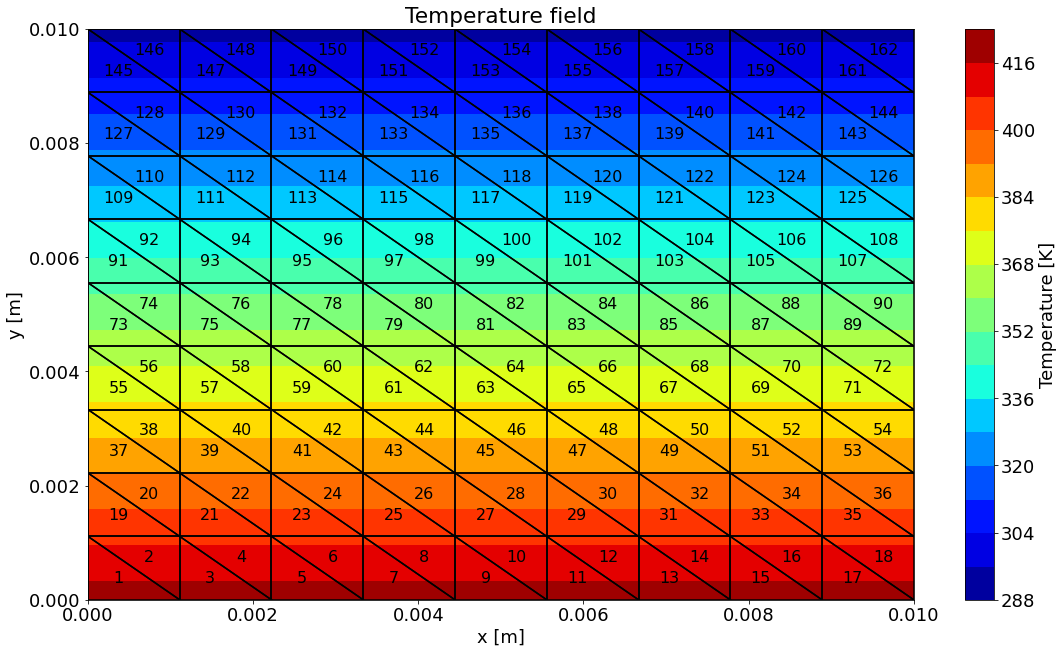

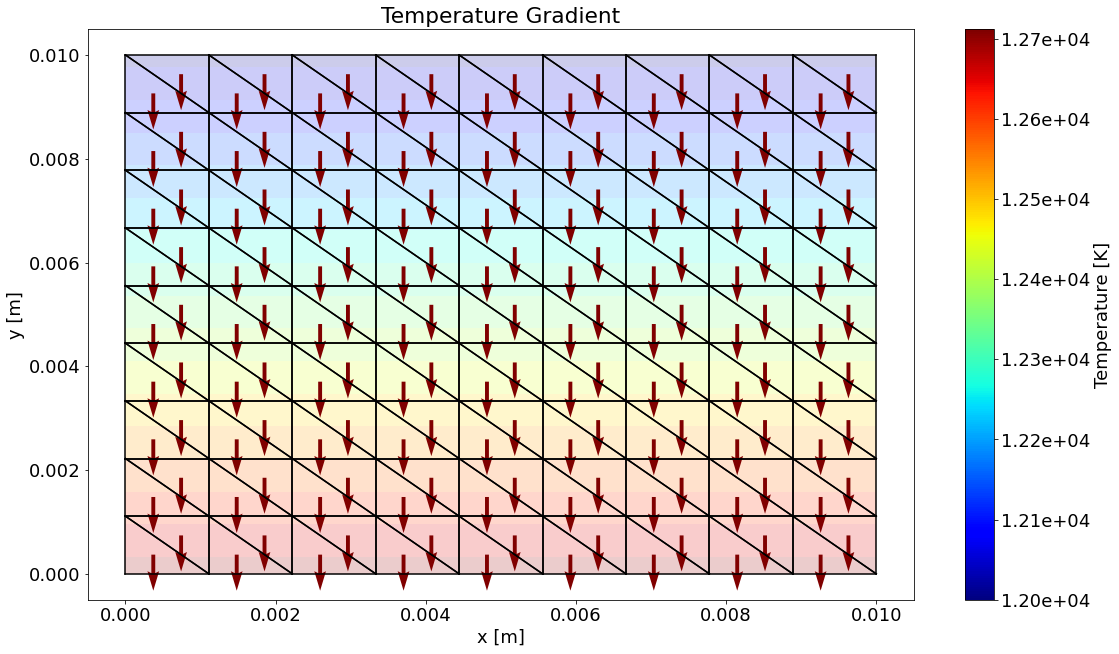

In [4]:
# Version 0
name = 'V0'

# Temperature vector
T = setUpT(n,dirichletT)

# Load vector
P = setUpP(n,L,hz,q)

Tri = Triangulation(L,n-1,n-1,k,hz,mode=0,factorV1=1,c=1)

runFem(Tri,name)

Temperature gradient - color_scale: 12000.0 - 12711.86440677988
Flux color_scale: 2999000.0 - 3000000.0000000517


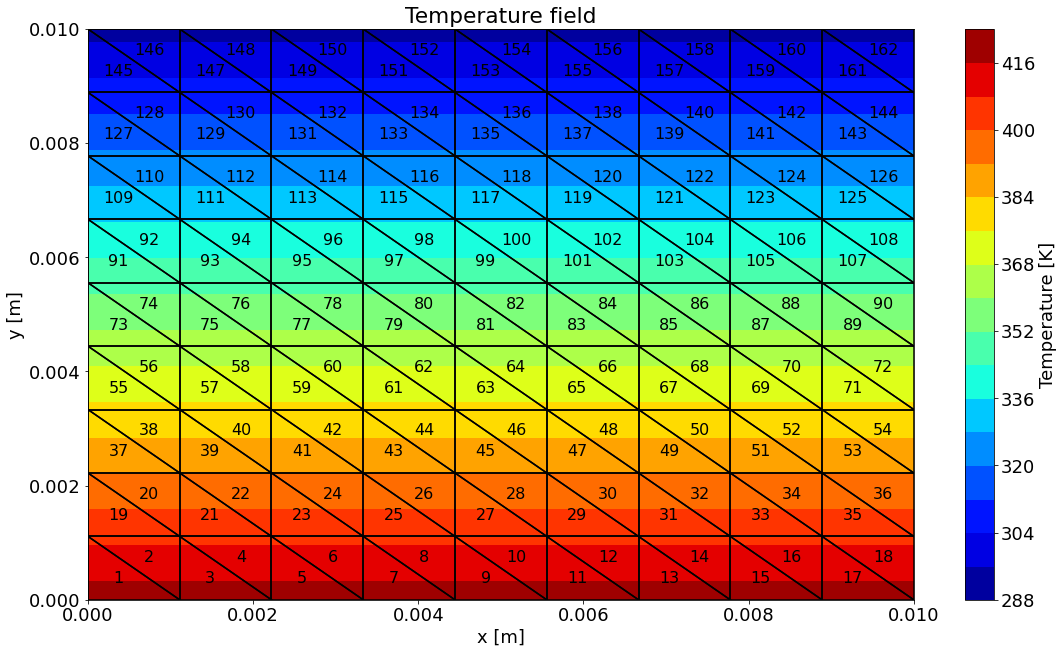

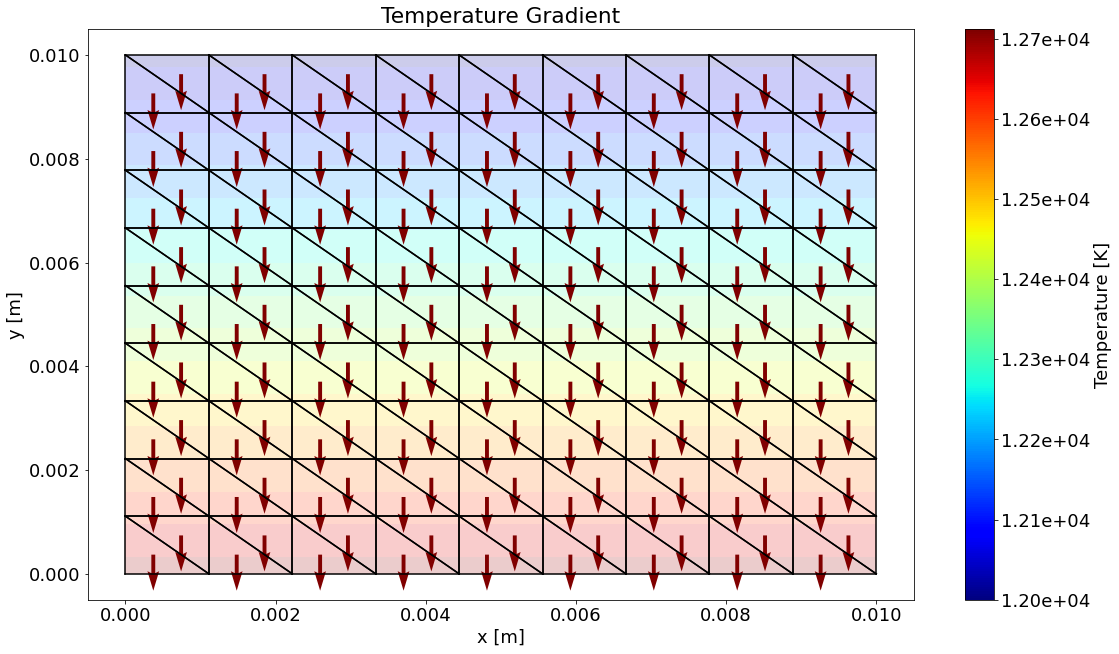

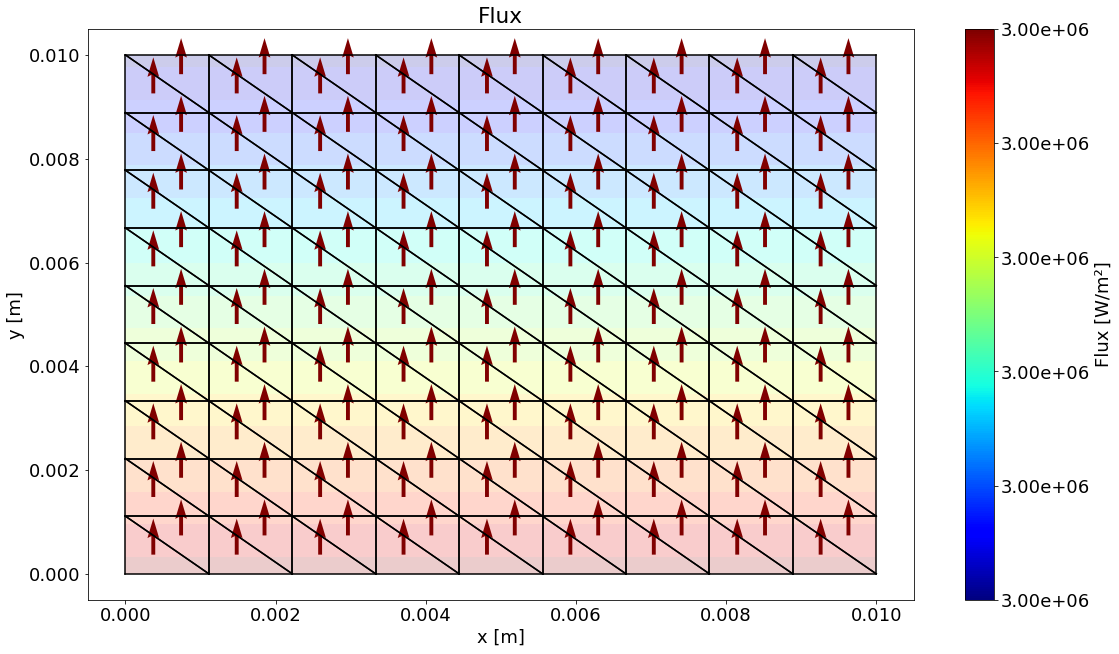

In [5]:
# Version 0
name = 'V0'

# Temperature vector
T = setUpT(n,dirichletT)

# Load vector
P = setUpP(n,L,hz,q)

Tri = Triangulation(L,n-1,n-1,k,hz,mode=0,factorV1=1,c=1)

runFem(Tri,name)

Temperature gradient - color_scale: 13231.883128586162 - 35484.74724596784
Flux color_scale: 3122724.4183463347 - 8374400.35004841


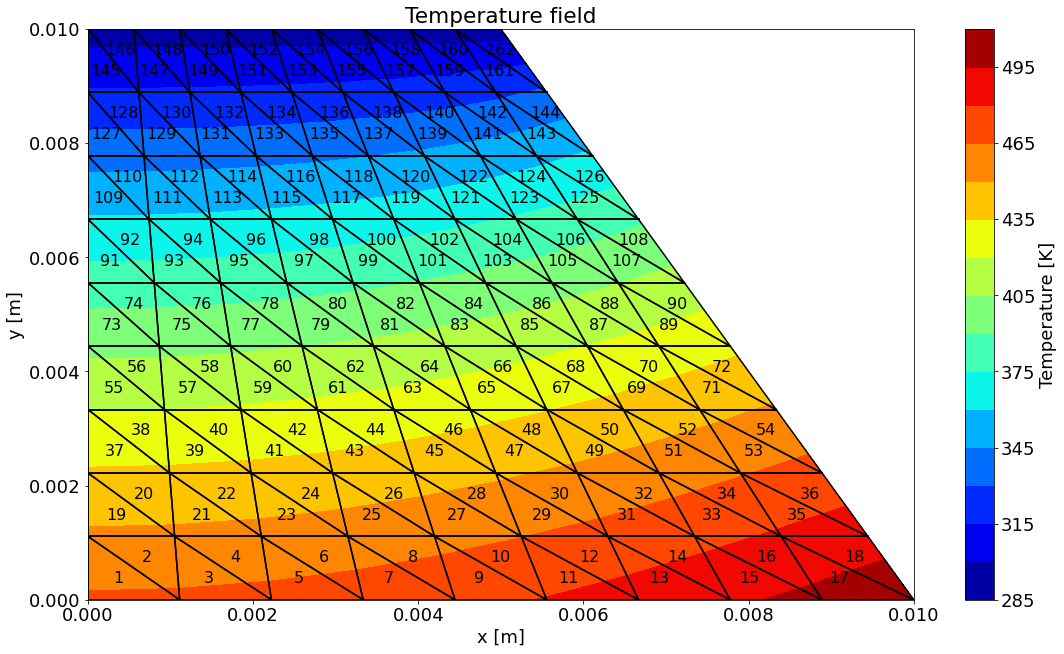

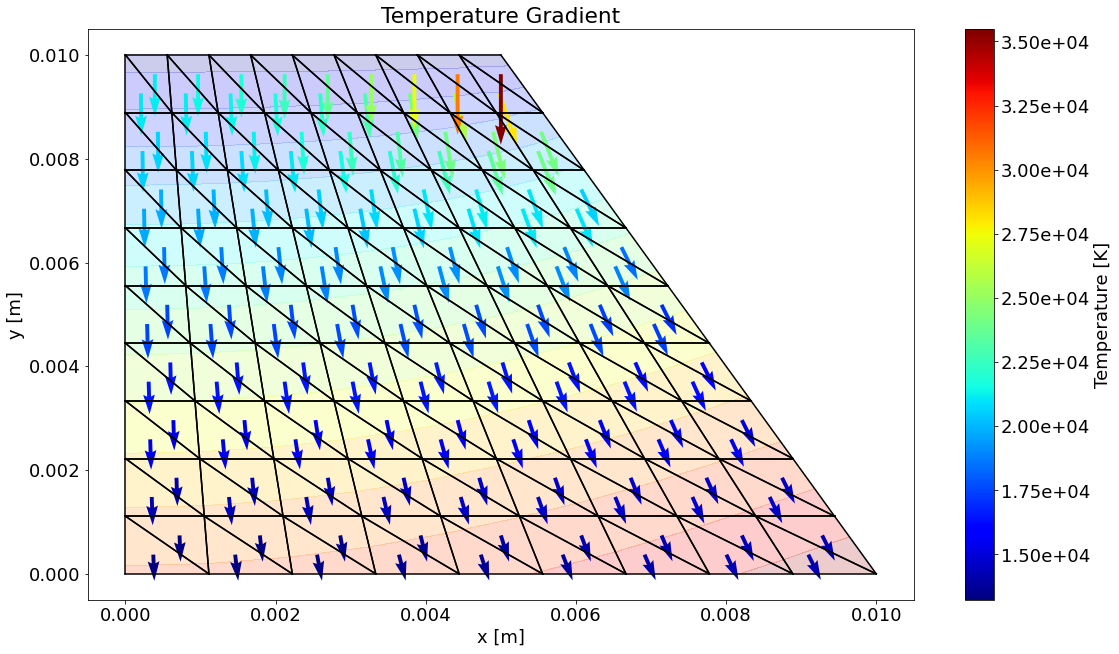

In [6]:
# Version 1
name = 'V1'

# Temperature vector
T = setUpT(n,dirichletT)

# Load vector
P = setUpP(n,L,hz,q)

Tri = Triangulation(L,n-1,n-1,k,hz,mode=1,factorV1=0.5,c=1)

runFem(Tri,name)

Temperature gradient - color_scale: 12000.0 - 12711.86440678013
Flux color_scale: 2999000.0 - 3000000.000000111


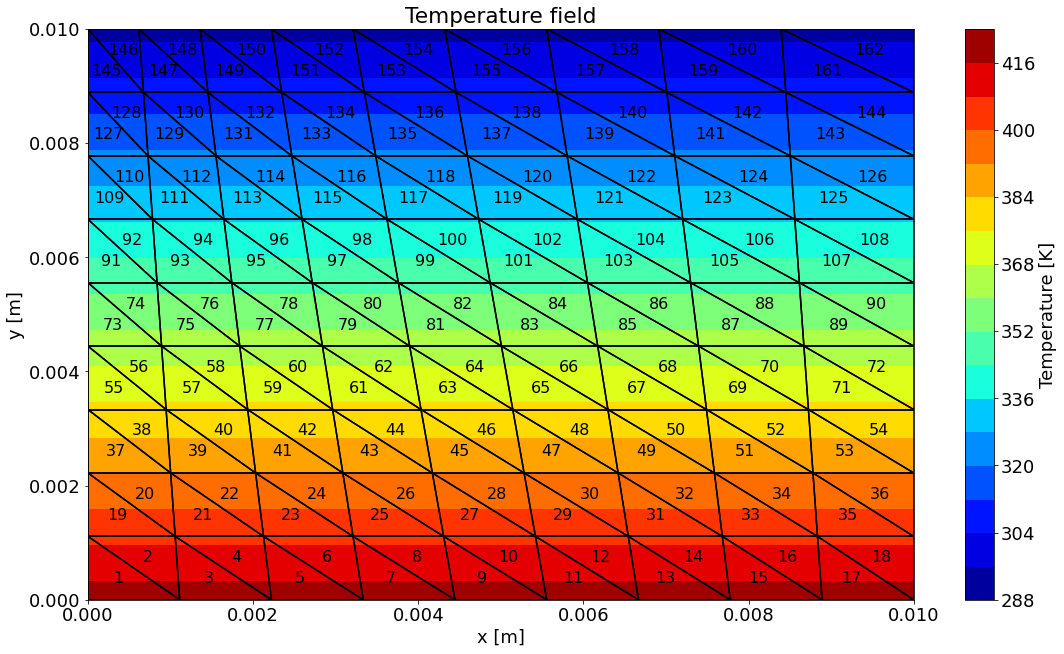

In [7]:
# Version 2
name = 'V2'

# Temperature vector
T = setUpT(n,dirichletT)

# Load vector
P = setUpP(n,L,hz,q)

Tri = Triangulation(L,n-1,n-1,k,hz,mode=2,factorV1=1,c=1)

runFem(Tri,name)

Temperature gradient - color_scale: 9318.988291433385 - 17997.70705265261
Flux color_scale: 2199281.2367782793 - 4247458.864426016


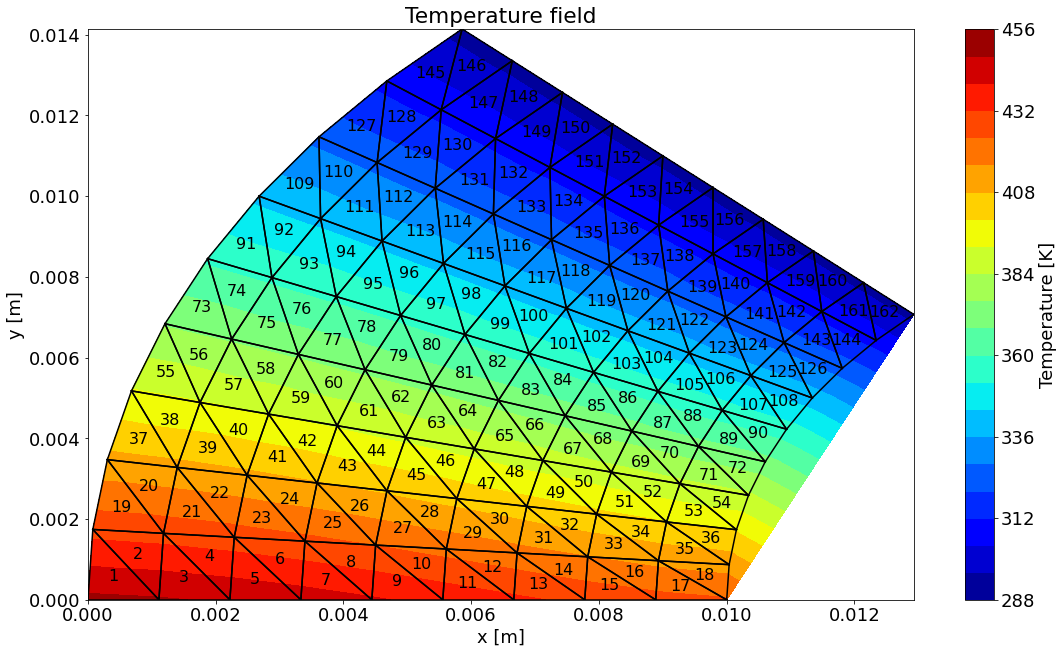

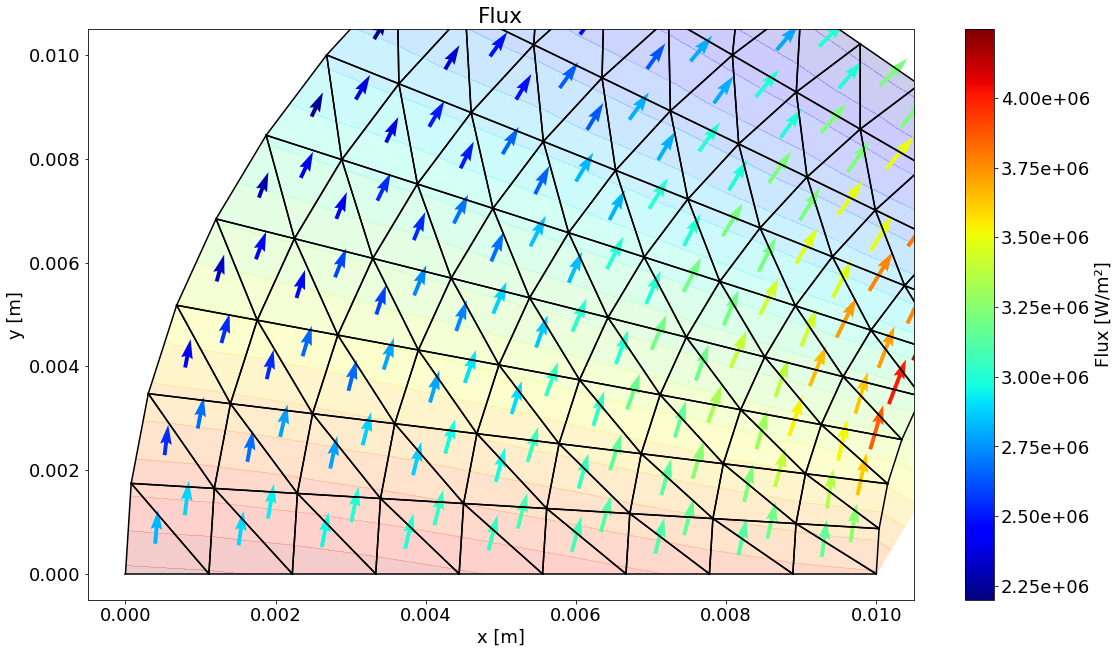

In [8]:
# Version 3
name = 'V3'

# Temperature vector
T = setUpT(n,dirichletT)

# Load vector
P = setUpP(n,L,hz,q)

Tri = Triangulation(L,n-1,n-1,k,hz,mode=3,factorV1=1,c=1)

runFem(Tri,name)

Temperature gradient - color_scale: 1799.781435414738 - 18506.983581352153
Flux color_scale: 676557.7107332072 - 8966413.755639208


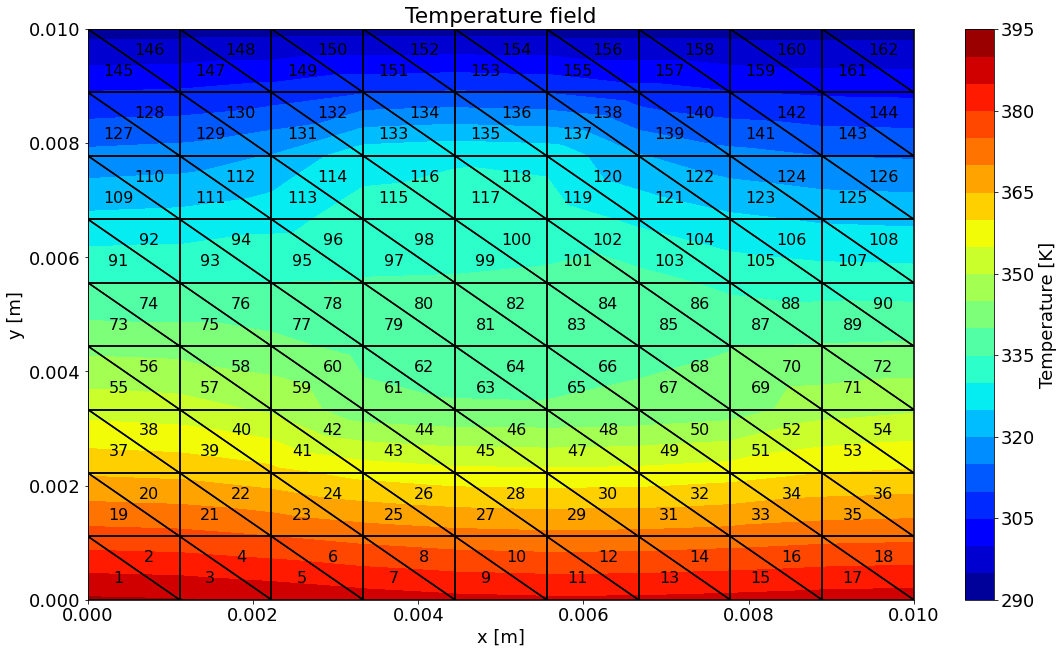

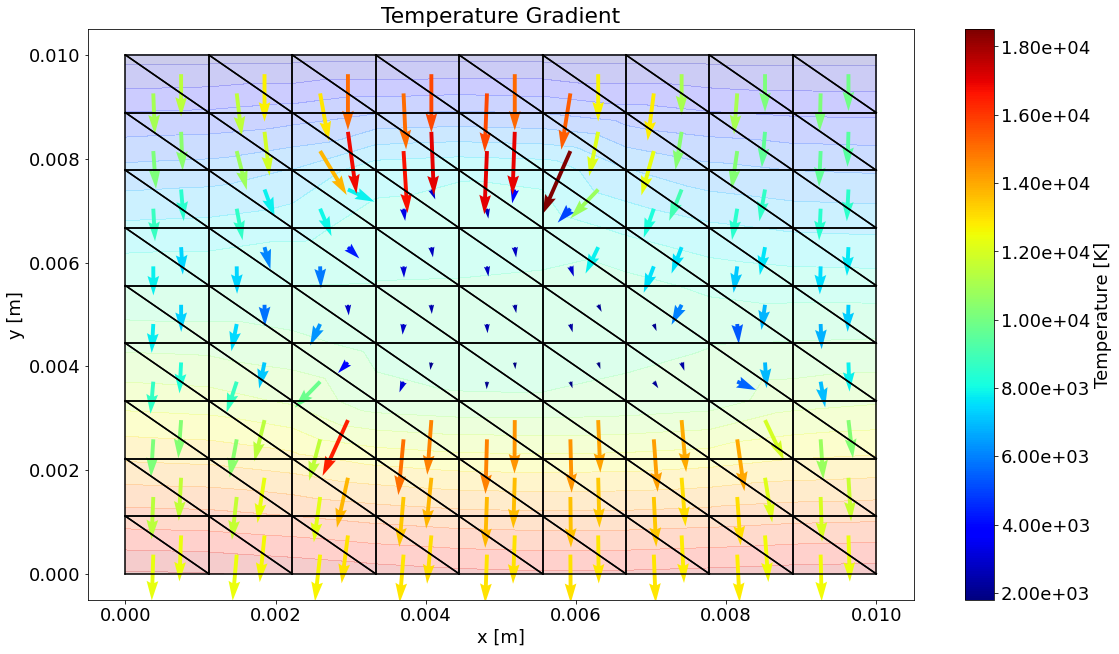

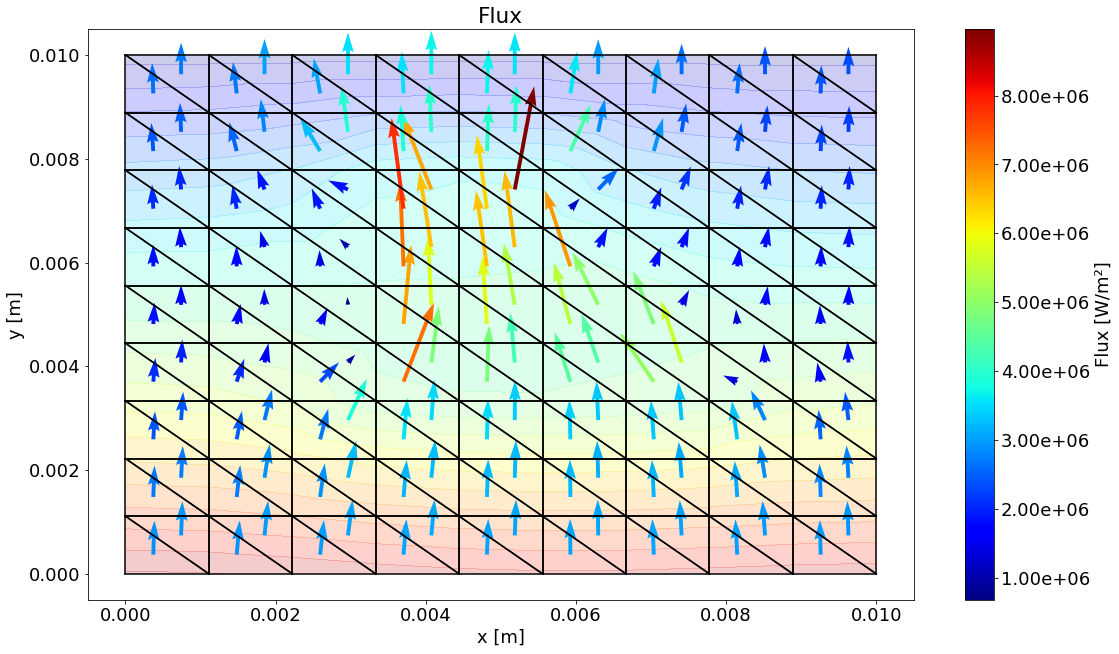

In [9]:
# Version 4.1
name = 'V41'

# Temperature vector
T = setUpT(n,dirichletT)

# Load vector
P = setUpP(n,L,hz,q)

Tri = Triangulation(L,n-1,n-1,k,hz,mode=4,factorV1=1,c=10)

runFem(Tri,name)

Temperature gradient - color_scale: 6789.274526345578 - 37441.65633442769
Flux color_scale: 300557.87825434835 - 7149498.23392371


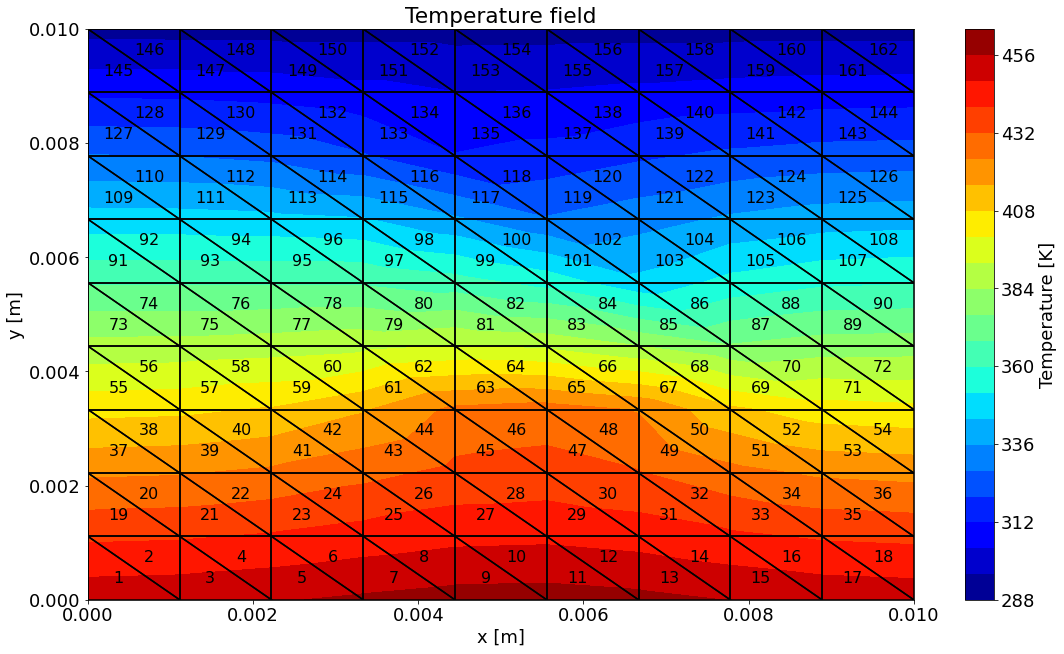

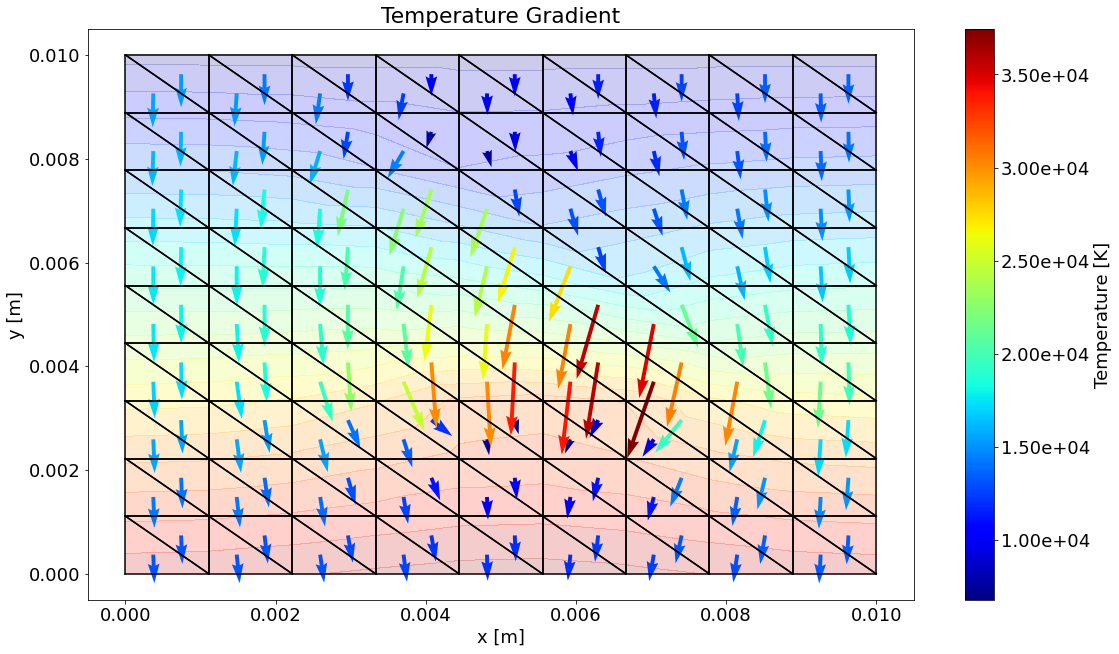

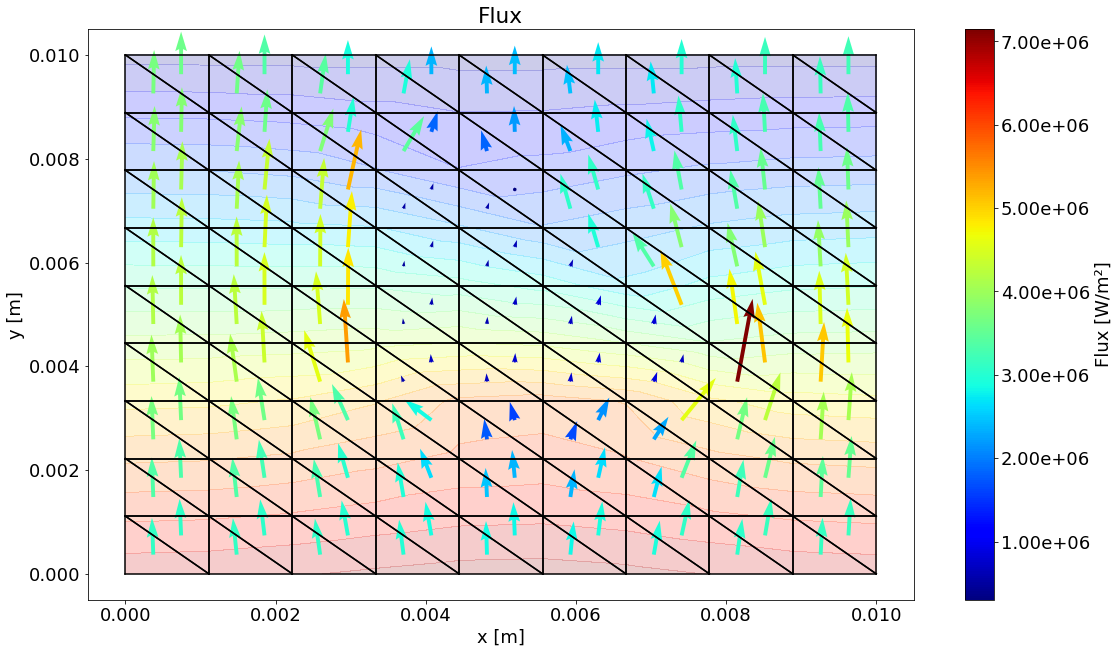

In [10]:
# Version 4.2
name = 'V42'

# Temperature vector
T = setUpT(n,dirichletT)

# Load vector
P = setUpP(n,L,hz,q)

Tri = Triangulation(L,n-1,n-1,k,hz,mode=4,factorV1=1,c=0.1)

runFem(Tri,name)